# t-SNE
 
t-SNE (*t-distributed Stochastic Neighbor Embedding*) una técnica para reducir la dimensionalidad de conjuntos de datos especialmente enfocada en la visualización de resultados por lo que, habitualmente, se busca reducir la dimensionlidad del conjunto de datos a 2 o 3 dimensiones.
 
Al igual que todos los algoritmos de reducción de dimensiones, t-SNE parte de un conjunto de datos representado por las muestras (puntos) $x_1, \dots, x_n$ y busca su proyección en otro conjunto de puntos $y_1, \dots, y_n$ sobre un espacio de menor dimensión. 
 
Para ello se construyen primero $n$ distribuciones de probabilidad, $p_i$, sobre los cada uno de los puntos $1, \dots, n$ de forma que
 
$$
p_i(j) \propto sim_x(x_i, x_j),
$$
 
donde $sim_x$ es una determinada métrica de similaridad entre puntos en el espacio original. Estas distribuciones son Gausianas centradas en cada punto y posteriormente ajustadas en función de la distancia de este con el resto de puntos de su entorno.
 
De la misma manera, se construyen distribuciones de probabilidad, $q_i$, sobre los cada uno de los puntos $1, \dots, n$ de forma que
 
$$
q_i(j) \propto sim_y(y_i, y_j),
$$
 
donde $sim_y$ es otra métrica de similaridad entre puntos en el espacio de dimensión inferior. Ahora, las distribuciones empleadas son t-Stundet con un grado de libertad, lo que se conoce como distribución de Cauchy.
 
Ambas distribuciones son similares:
 
<img src="https://miro.medium.com/max/1400/1*bLzoEHeWHZIMas9vJb7ctA.png" width="600">
 
Lo ideal, por tanto, es encontrar puntos $y_1, \dots, y_n$ tales que cada $p_i$ sea lo más parecida posible a la correspondiente $q_i$. Esto se logra haciendo que la suma de las [divergencias de Kullback-Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) entre las parejas de distribuciones sea lo menor posible.
 
De este modo se define un problema de optimización cuya resolución, mediante el descenso de gradiente, genera los parámetros necesarios para transformar los puntos $x_1, \dots, x_n$ en $y_1, \dots, y_n$.


El concepto principal de t-SNE consiste en que los puntos cercanos (en el espacio multi-dimensional) se atraen y los distantes se repelen. Para ello, el entrenamiento de t-SNE viene gobernado por, principalmente, dos hyper-parámetros: $perplexity$, la cantidad de vecinos que un simple punto puede afectar (esto se logra manipulando la distribución Gausiana en la que se centra cada punto $x_i$), y $epsilon$, la velocidad de aprendizaje (*learning rate*).
 
Martin Wattenberg, Fernanda Viégas y Ian Johnson realizar un magnífico análisis de estos parámetros y su funcionamiento en t-SNE en el siguiente enlace: [https://distill.pub/2016/misread-tsne/](https://distill.pub/2016/misread-tsne/).

En `sklearn` t-SNE se encuentra implementado en [`sklearn.manifold.TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE). Veamos un ejemplo de su uso:

In [0]:
import sklearn
from sklearn import datasets
mnist = datasets.load_digits(n_class=10)

X = mnist.data
y = mnist.target

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

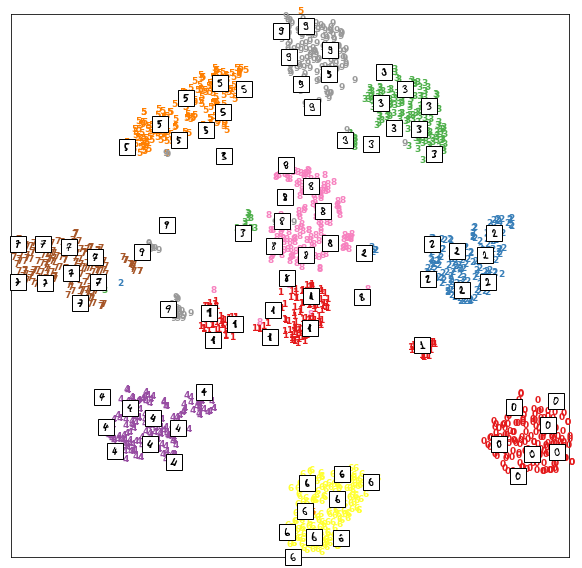

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.manifold import TSNE

perplexity = 34  #@param {type: "slider", min: 5, max: 50, step: 1}


tsne = TSNE(n_components=2, perplexity=perplexity)
X_projected = tsne.fit_transform(X)

# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
X_projected = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected.shape[0]):
    plt.text(X_projected[i, 0], X_projected[i, 1], str(y[i]),
              color=plt.cm.Set1(y[i] / 10.),
              fontdict={'weight': 'bold', 'size': 9})


# pintamos las imagenes de los numeros
shown_images = np.array([[1., 1.]])  # just something big
for i in range(X.shape[0]):
    dist = np.sum((X_projected[i] - shown_images) ** 2, 1)
    if np.min(dist) < 2e-3:
        # don't show points that are too close
        continue
    shown_images = np.r_[shown_images, [X_projected[i]]]
    imagebox = offsetbox.AnnotationBbox(
        offsetbox.OffsetImage(mnist.images[i], cmap=plt.cm.gray_r),
        X_projected[i])
    ax.add_artist(imagebox)

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])